# Offensive Tweet Detector
## By [Bhavneek Singh](https://bhavneek.netlify.app/)
### About Data

count = number of CrowdFlower users who coded each tweet (min is 3, sometimes more users coded a tweet when judgments were determined to be unreliable by CF)

hate_speech = number of CF users who judged the tweet to be hate speech.

offensive_language = number of CF users who judged the tweet to be offensive.

neither = number of CF users who judged the tweet to be neither offensive nor non-offensive

class = class label for majority of CF users. 0 - hate speech 1 - offensive language 2 - neither

[Source](https://github.com/t-davidson/hate-speech-and-offensive-language/blob/master/data/labeled_data.csv)

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing and preprocessing data

In [32]:
df = pd.read_csv("labeled_data.csv")

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [35]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [37]:
df['class']=df['class'].replace(0,1)

In [38]:
df['class']=df['class'].replace(-1,0)

In [39]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


## Separating Feature and Label

In [40]:
X = df['tweet']
y = df['class']

## Train Test Split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## NLP

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
tfidf = TfidfVectorizer(stop_words='english')

In [45]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [46]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [47]:
X_train_tfidf

<19826x30801 sparse matrix of type '<class 'numpy.float64'>'
	with 168702 stored elements in Compressed Sparse Row format>

### Naive-Bayes

In [48]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

### SVC

In [50]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tfidf,y_train)

LinearSVC()

### Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train_tfidf,y_train)

RandomForestClassifier(n_estimators=1000)

In [53]:
from sklearn.metrics import plot_confusion_matrix
def report(model):
    preds = model.predict(X_test_tfidf)
    plot_confusion_matrix(model,X_test_tfidf,y_test,normalize='true')

### Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_tfidf,y_train)

DecisionTreeClassifier()

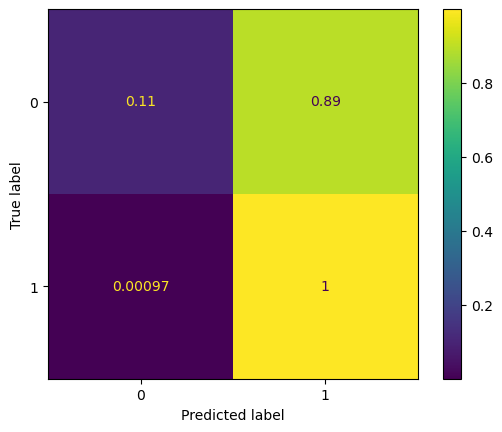

In [55]:
report(nb)

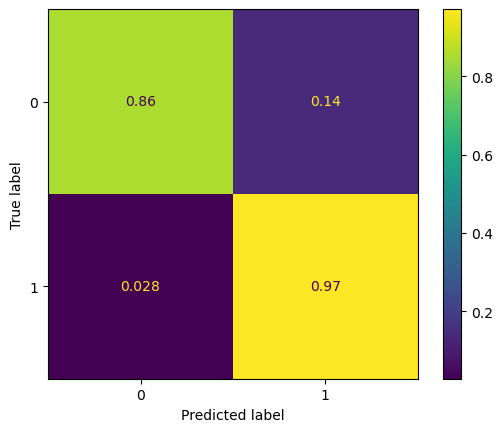

In [56]:
report(svc)

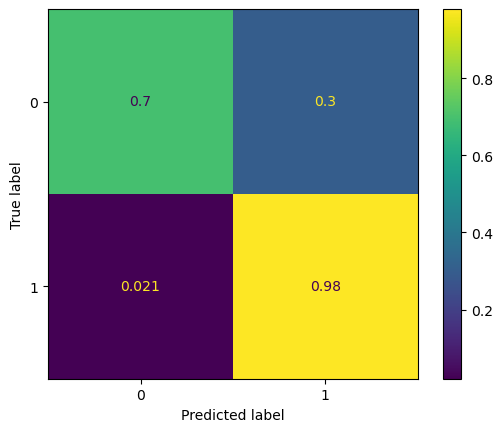

In [57]:
report(log)

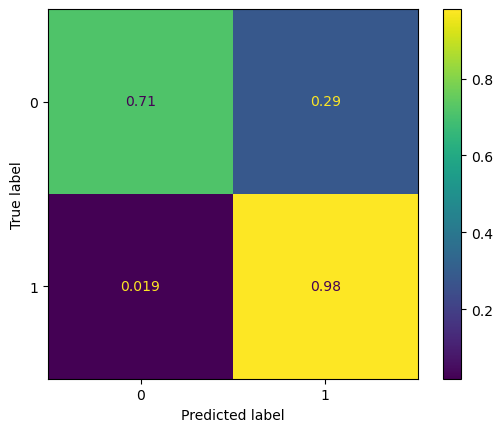

In [67]:
report(rfc)

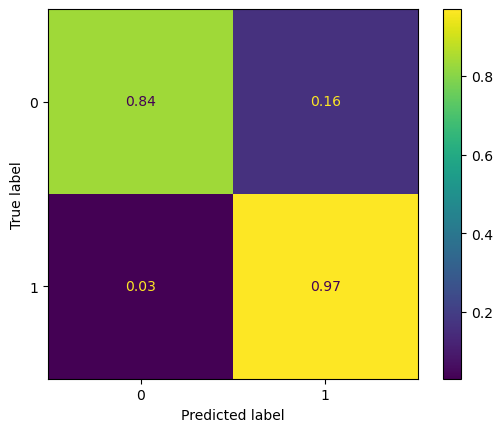

In [65]:
report(dtc)

## Inference
DTC an SVM produce most accurate results

But DTC cannot be improve much further, so we will do gridSearch on SVM

### Grid Search CV

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
from sklearn.svm import SVC
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf','poly','sigmoid']}
grid = GridSearchCV(svm,param_grid)

In [ ]:
grid.fit(X_train_tfidf,y_train)

In [73]:
grid.best_params_

{'C': 1, 'kernel': 'linear'}

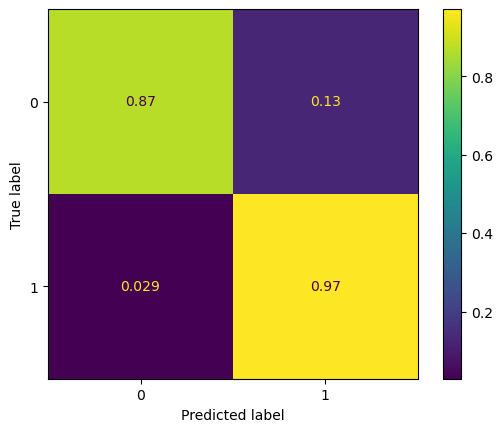

In [72]:
report(grid)

# Results
Linear SVM with C=1 results best in terms of accuracy